LINEAR ALGEBRA PROJECT PROBLEM 2- SVD

Team Members  - 

Rahil Kothari,
Jitesh Sidhani,
Harshit Sahani

In [ ]:
#svd for image compression

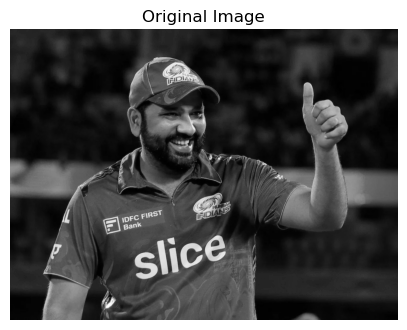

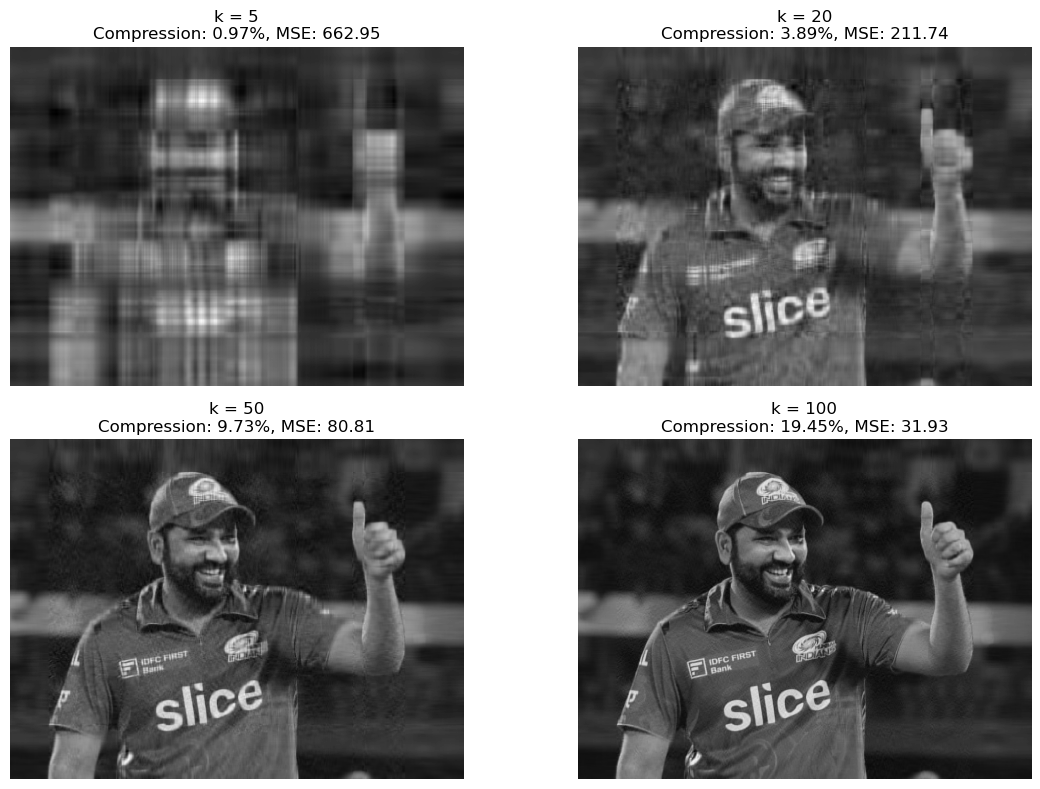

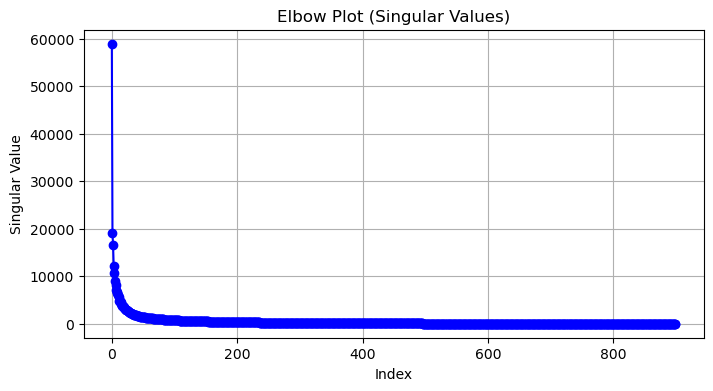

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Loading grayscale image
image = Image.open('img2.webp').convert('L')
image_matrix = np.array(image)
m, n = image_matrix.shape

# Applying SVD
U, S, VT = np.linalg.svd(image_matrix, full_matrices=False)

# Reconstructing image using top k components
def reconstruct_image(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return np.dot(U_k, np.dot(S_k, VT_k))

# Calculating compression ratio and mean squared error
def get_metrics(original, reconstructed, k, m, n):
    comp_ratio = (k * (m + n + 1)) / (m * n)
    mse = mean_squared_error(original, reconstructed)
    return comp_ratio, mse

# Showing original image
plt.figure(figsize=(5, 5))
plt.imshow(image_matrix, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Displaying reconstructions for different k values
k_values = [5, 20, 50, 100]
plt.figure(figsize=(12, 8))
for i, k in enumerate(k_values):
    reconstructed = reconstruct_image(U, S, VT, k)
    comp_ratio, mse = get_metrics(image_matrix, reconstructed, k, m, n)
    plt.subplot(2, 2, i + 1)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f'k = {k}\nCompression: {comp_ratio:.2%}, MSE: {mse:.2f}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plotting elbow plot of singular values
plt.figure(figsize=(8, 4))
plt.plot(S, marker='o', color='blue')
plt.title('Elbow Plot (Singular Values)')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()
